# Анализ  продаж по компьютерным играм.

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [1]:
import pandas as pd

In [2]:
#загрузка данных
data=pd.read_csv('/datasets/games.csv')
print(data.head(5))

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


## Подготовка данных

In [3]:
import numpy as np
import matplotlib as plt
#переименование столбцов 
data.columns = data.columns.str.lower()

print(data.columns)



Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:

#проверка пропусков 
data.info()
data.describe()
print(data.isnull().sum())

print(data['year_of_release'].isna().sum())

#преобразуем значения даты, в тип другой тип 
data['year_of_release'] = data['year_of_release'].astype('Int64')
print(data['year_of_release'].isna().sum())

#удали игры, в которых не сдержаться года
data= data.dropna(subset=['year_of_release'])

#заменим значение tbd на nan
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype(float)

#проверим незаполненные значения по столбцам genre 
print(data[data['genre'].isna()])

#исключим из списка строки 659 и 1422, так как они не несу цельной информации и не повлияют на исследование 
data.drop([659, 14244],inplace=True)

#создадим новый столбце с общей стоймостью во всех регионах
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
print(data.head(10))

#уберем дубликаты
data.drop_duplicates()

#сделаем заглушки для значений столбца рейтинг ESRB
data['rating'] = data['rating'].fillna('unknown')
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
r

* Пропуски в столбце 'critic_score' может быть связана с тем, что не было критиков, то есть не было культуры оценивания игр критиками. Нулевые значения в столбце 'critic_score' сложно заменить каким-либо другие.Поэтому оставим их незаполнеными.  
* В столбце 'user_score' можно заменить значения оценкой критиков деленной на 10, чтобы они не привышали 10. Но я считаю, что это не целесообразно, так сделаю показания неточными. Поэтому оставим их такими, какие есть сейчас. Возможно не было нужно сервиса для оценки и чата, где можно было бы поставить свою оценку. Также возможно это было не очень доступно для некоторых людей. 
* Оценка ESRB появилась только в 1994 году, поэтому вполне возможно, что данные отсутвуют именно за период ранее. К тому же разные категории появлись в разные приоды времени, поэтому с датой выпуска их могли просто не оценить, так как не было дожной категории. 



## Провединие исследовательского анализа данных

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


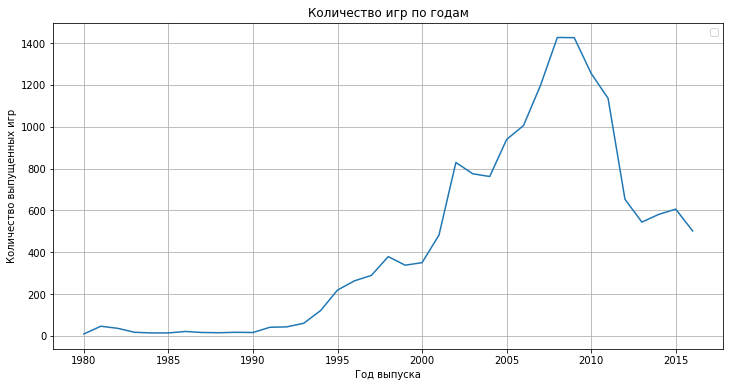

In [6]:
import matplotlib.pyplot as plt

data_of_year= data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True,figsize=(12,6))
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
print(data.groupby(by=['year_of_release'])['name'].count())

Из графика видно, что игровая индустрия начиная с 1980 имела тенденцию роста и с каждым годом выпускалось еще больше игр. 2008 год имел пиковый показатель по выпуску игр и начиная с 2009 года количество выпускаемых игр начало сокращаться. 
Это можно объяснить тем, что начало 1980-х годов совпало с появлением многих домашних компьютеров и разработчиков игр на них. Позже начинают появляться и игровые приставки, которые также влияют на рост выпуска игр. Однако, в 2008 году вместе с пиковыми показателями происходит и начало кризиса игровой индустрии. Это связано и мировым экономическим кризисом 2008-2013 года 


In [7]:
#для анализа платформ возмем 6 с наибольшими суммарными продажами и посмотрим распределение для каждой из них
print(data.groupby(by=['platform'])['total_sales'].sum().sort_values(ascending=False).head(10))

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


Text(0.5, 1.0, '3DS')

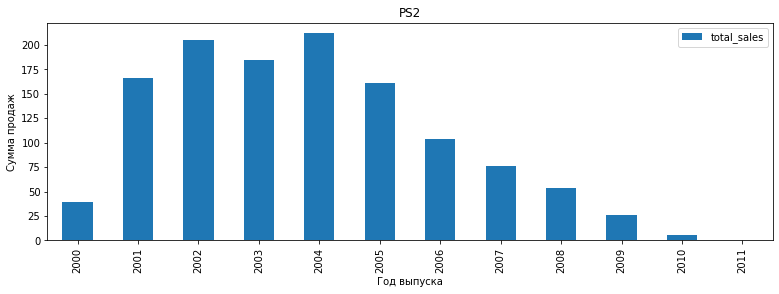

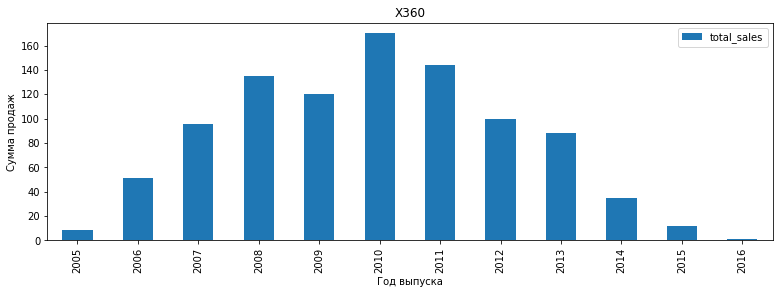

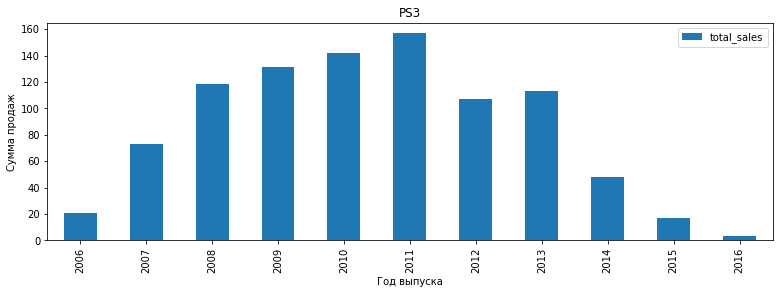

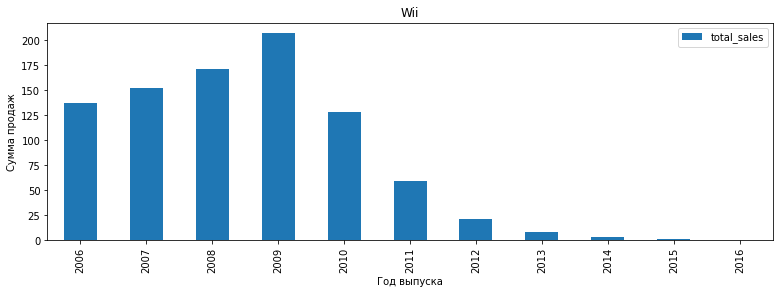

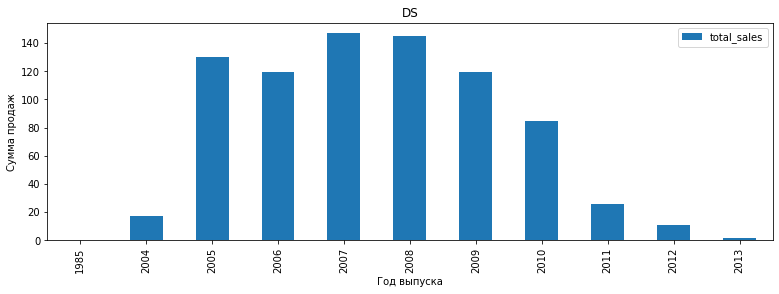

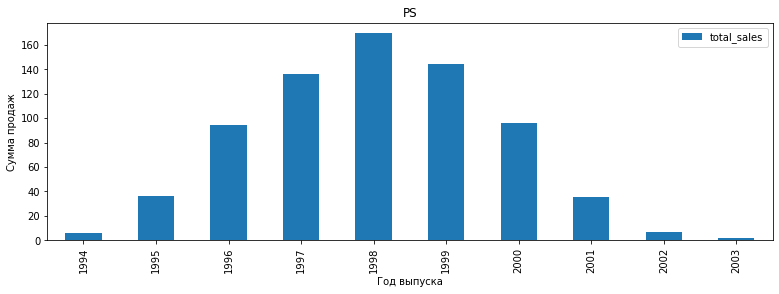

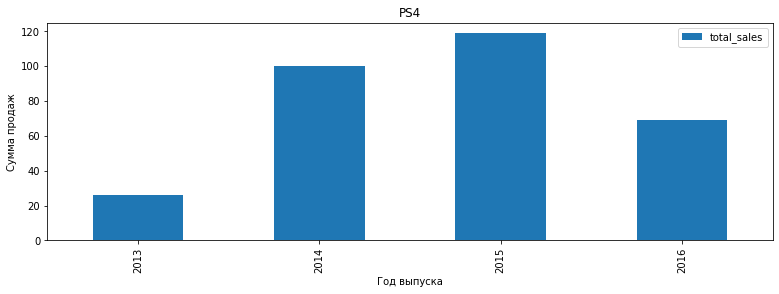

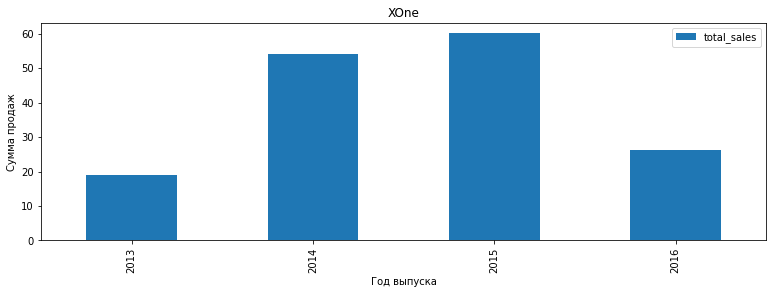

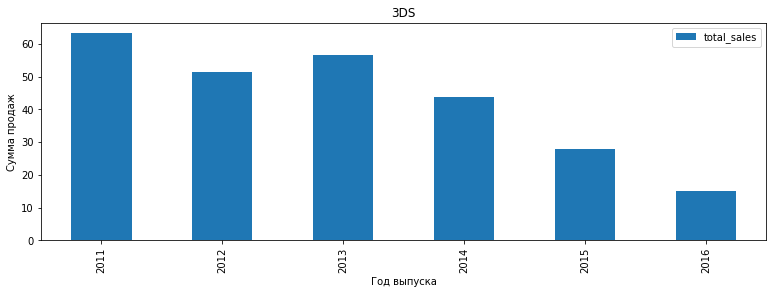

In [8]:

data.query("platform == 'PS2'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('PS2')

data.query("platform == 'X360'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('X360')

data.query("platform == 'PS3'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('PS3')

data.query("platform == 'Wii'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('Wii')

data.query("platform == 'DS'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('DS')

data.query("platform == 'PS'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('PS')

data.query("platform == 'PS4'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('PS4')

data.query("platform == 'XOne'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('XOne')

data.query("platform == '3DS'").pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')\
             .plot(kind='bar', figsize=(13,4))
plt.xlabel("Год выпуска")
plt.ylabel("Сумма продаж")
plt.title('3DS')

- Платформы X360 и PS3 исчезли примерно в одно время, а именно в 2016 году, и начинали свое развитие в 2005 году.
- PS2 с 2000 по 2010 год
- Wii с 2006 по 2016. Также стоит заметить, что они достаточно быстро вошли в игровую индустрию, но при этом также быстро с него ушли, потому что с 2013 года видно, что у них было очень маленькое количество продаж
- DS начали свое развитие в 1985 году, продаж было очень мало, так что можно не учитывать этот год. Поэтому можно сказать, что платформа развивалась с 2004 года по 2013 год
- PS с 1994 по 2003 год. 

Проверим данные по платформе DS за 1985 год. 

In [9]:
data[(data['year_of_release'] < 2000) & (data['platform'] == 'DS')]
data.drop([15957],inplace=True)

Данная игра была выпущенна в 2010 году, поэтому дата выпуска указана неверна. Также исключу данную строку, так как она не несет в себе ценной информации, а лишь вводит в замешательства. 


Из перечисленного выше можно сделать вывод, что характерный срок, в который появляются новые и исчезают старые платформы примерно 8-10 лет. Например, самая старая платформа PS была актуально 10 лет и уже 2004 - 2005 году ей на смену пришли другие платформы. Платформа Wii "прожила" 8 лет, так как с 2013 сильно упало суммы продаж. Но для дальнейшего исследования все же возьмем 3 последних года, так как индустрия игр быстро развивается и прогноз с охватом большего срока будет ошибочным. 


In [10]:
#Возьмем данные за актуальный период 
data_new = data.query("year_of_release >= 2014")
data_new.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98


Для дальнейшего исследования будем использовать данные, которые могут быть актуальными для нашего периода. И так как применый период "жизни" платформ, как мы определили при анализи ранее, от 8 до 10 лет, возьмем 9 лет. То есть для будущего 2017 года будут актуальны платформы, которые были активны с 2010 года. 

Посмотри игры, которые выпущенный в выбранный нами актуальный период, для проведения анализа.

In [12]:
#топ-5 платформ самых популярных платформ за актуальный период 
print(data_new.groupby(by=['platform'])['total_sales'].sum().sort_values(ascending=False))

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64


Из данных видно, что самыми популярными платформами являются PS4 и XOne, которые можно назвать наиболее перспективными для 2017 года. 
Это можно объяснить тем, что данные платформы являются наиболее новыми для пользователей. А такие платформы,
как Wii и PSP уже утеряли свою актуальность и не поддерживают современные форматы игр. 


**Рассмотрим подробнее разбивку по играм выпущенным на различных платформах.** 

(0.0, 2.0)

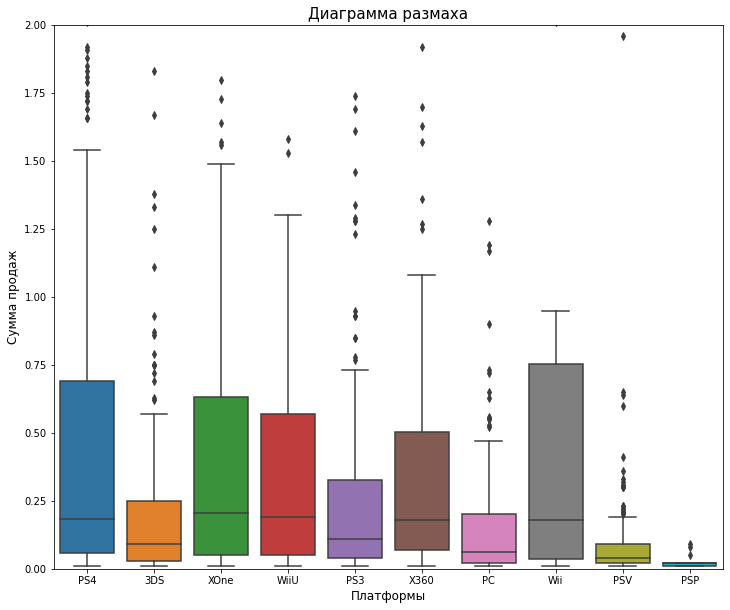

In [13]:
#data_new.query("platform == 'PS3'").boxplot(column = 'total_sales')
#plt.title('PS3')
#plt.xlabel('Платформа', fontsize=12)
#plt.ylabel('Сумма продаж',fontsize=12)
#plt.ylim(0, 15)

import seaborn as sns

plt.figure(figsize=(12,10))
sns.boxplot(data=data_new, x='platform', y='total_sales')
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.ylim(0,2)

Медианные значения по топовым платформам варируются примерно от 0,1 до 1,8 млн рублей за одну (Wii, XOne, PS4). Это означает, что среднее сумма продаж одной игры составляется от 0,1 до 1,8 млн. 

Можно также выделить платформу PSP, медианное значение продаж, которого составляте примерно 0,025, что показывает, плохую окупаемость или же низкую стоимость продукта. 




**Посмотри, как влияют отзывы пользователей на продажи платформы**

Корреляция между отзывами и продажами: 1.0
Корреляция между отзывами и продажами: nan


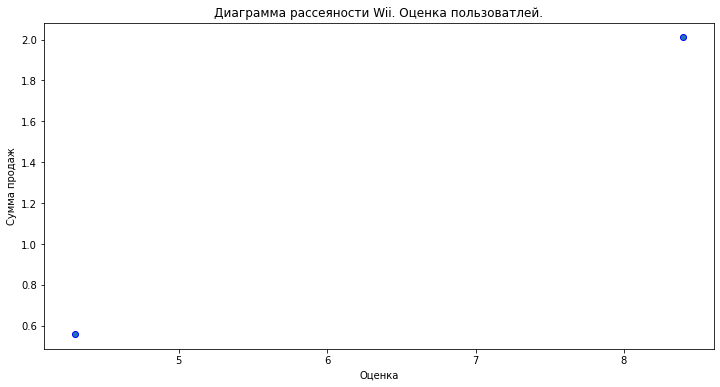

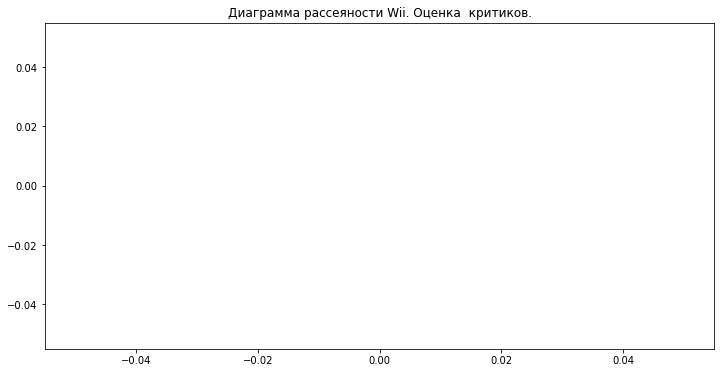

In [14]:
#проверим корреляцию
data_new_wii = data_new[data_new['platform']=='Wii']
print("Корреляция между отзывами и продажами:",data_new_wii['user_score'].corr(data_new_wii['total_sales']))
print("Корреляция между отзывами и продажами:",data_new_wii['critic_score'].corr(data_new_wii['total_sales']))


#построим диаграмму рассеяности 
plt.figure(figsize=(12,6))
plt.scatter(x='user_score', y='total_sales', data=data_new_wii, edgecolors = 'blue')
plt.title('Диаграмма рассеяности Wii. Оценка пользоватлей.')
plt.xlabel('Оценка')
plt.ylabel('Сумма продаж')

plt.figure(figsize=(12,6))
plt.scatter(x='user_score', y='critic_score', data=data_new_wii, edgecolors = 'blue')
plt.title('Диаграмма рассеяности Wii. Оценка  критиков.')
plt.scatter(x='user_score', y='critic_score', data=data_new_wii, edgecolors = 'blue')


Посмотрим подборнее с чем это может быть связано

In [15]:
 data_new[data_new['platform']=='Wii']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
850,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
2179,Just Dance 2016,Wii,2015,Misc,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
2180,Skylanders: Trap Team,Wii,2014,Action,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
3611,FIFA 15,Wii,2014,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
7991,How to Train Your Dragon 2,Wii,2014,Adventure,0.04,0.13,0.0,0.01,NaN,NaN,E10+,0.18
8009,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.0,0.01,NaN,NaN,E10+,0.18
8941,Skylanders: SuperChargers,Wii,2015,Action,0.02,0.12,0.0,0.01,NaN,NaN,unknown,0.15
13570,Disney Planes Fire & Rescue,Wii,2014,Action,0.00,0.04,0.0,0.00,NaN,NaN,unknown,0.04
14682,Barbie and Her Sisters Puppy Rescue,Wii,2015,Action,0.00,0.03,0.0,0.00,NaN,NaN,E,0.03
16144,Penguins of Madagascar,Wii,2014,Action,0.00,0.01,0.0,0.00,NaN,NaN,E,0.01


Оценки пользователей и критиков в большей части игр для данной платформы в большей мере отсутвуют, поэтому не целесообразно проводить анализ данной платформы на актульный период

Зависимость между отзывами клиентов и продажами очень мала, так как коррелция равна всего 0,15

Корреляция между отзывами и продажами: -0.16676141347662118
Корреляция между оценкой критиков и продажами: 0.44657460493190704


Text(0, 0.5, 'Сумма продаж')

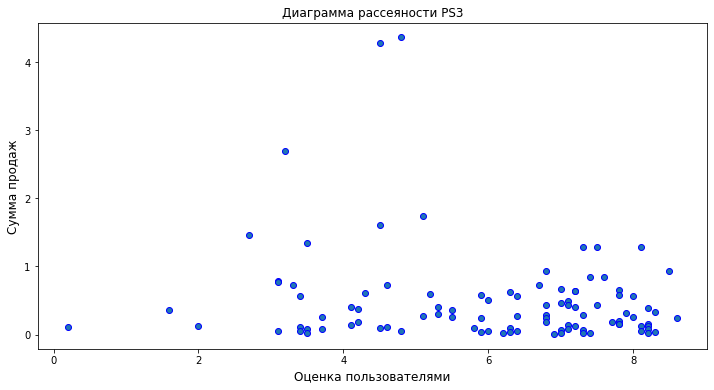

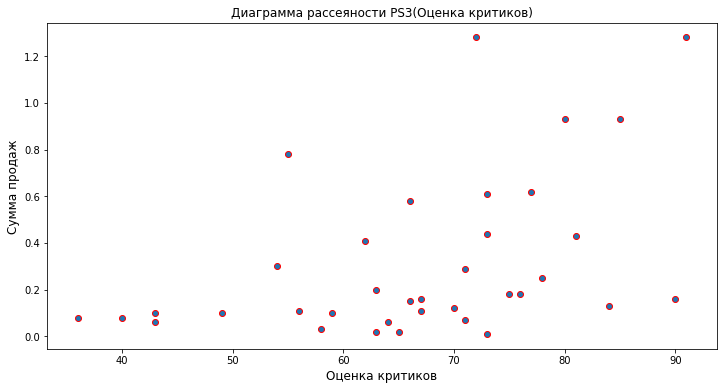

In [16]:
#Посмотрим данные показтели и для других платформ
data_new_ps3 = data_new[data_new['platform']=='PS3']
print("Корреляция между отзывами и продажами:",data_new_ps3['user_score'].corr(data_new_ps3['total_sales']))
print("Корреляция между оценкой критиков и продажами:",data_new_ps3['critic_score'].corr(data_new_ps3['total_sales']))

#построим диаграмму рассеяности 
plt.figure(figsize=(12,6))
plt.scatter(x='user_score', y='total_sales', data=data_new_ps3, edgecolors = 'blue')
plt.title('Диаграмма рассеяности PS3')
plt.xlabel('Оценка пользователями', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)

plt.figure(figsize=(12,6))
plt.title('Диаграмма рассеяности PS3(Оценка критиков)')
plt.scatter(x='critic_score', y='total_sales', data=data_new_ps3, edgecolors = 'red')
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)


Корреляция между отзывами и продажами является очень слабоотрицательной, поэтому можно сделать вывод, что оценка пользователей не влияет на продажи. А корреляция между оценкой критиков и продажам положительно отрицательная, но также слаба, следовательо и оценка критиков не влияет на продажи.

Корреляция между отзывами и продажами: -0.138444570945665
Корреляция между отзывами и продажами: 0.5257228356581523


Text(0, 0.5, 'Сумма продаж')

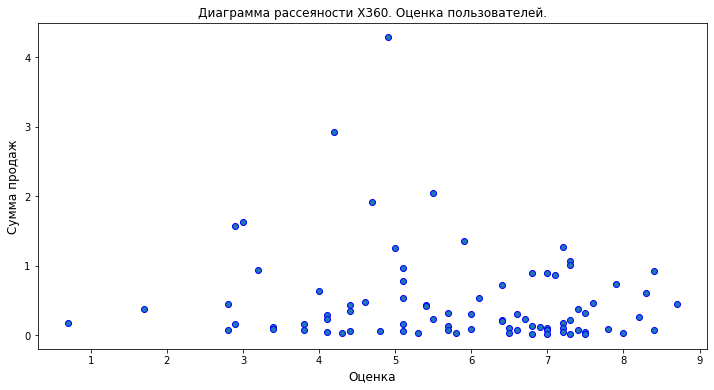

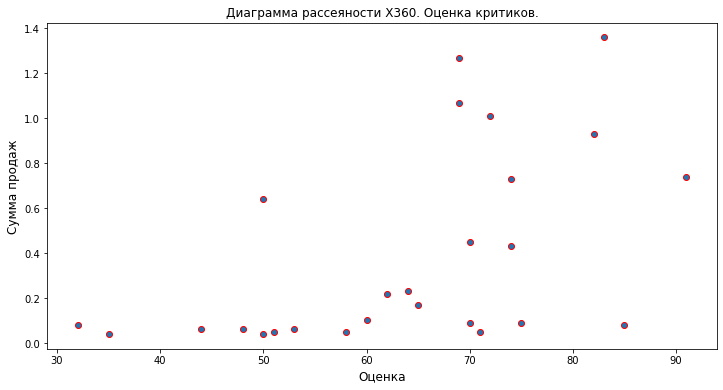

In [17]:
#Посмотрим данные показтели и для других платформ
data_new_x360 = data_new[data_new['platform']=='X360']
print("Корреляция между отзывами и продажами:",data_new_x360['user_score'].corr(data_new_x360['total_sales']))
print("Корреляция между отзывами и продажами:",data_new_x360['critic_score'].corr(data_new_x360['total_sales']))


#построим диаграмму рассеяности 
plt.figure(figsize=(12,6))
plt.scatter(x='user_score', y='total_sales', data=data_new_x360, edgecolors = 'blue')
plt.title('Диаграмма рассеяности X360. Оценка пользователей.')
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)

plt.figure(figsize=(12,6))
plt.scatter(x='critic_score', y='total_sales', data=data_new_x360, edgecolors = 'red')
plt.title('Диаграмма рассеяности X360. Оценка критиков.')
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)

Корреляция между отзывами и продажами является очень слабоотрицательной, поэтому можно сделать вывод, что оценка пользователей не влияет на продажи. А корреляция между оценкой критиков и продажам положительно отрицательная, но также слаба, следовательо и оценка критиков не влияет на продажи.

Анализ влияния оценки пользователей и оценки критиков на продажи для платформы DS мы исключаем, так как данная платформа перестала выпускать игры с 2013 года. 

Корреляция между отзывами и продажами: -0.040131589472697356
Корреляция между оценкой критиков и продажами: 0.40266141068104083


Text(0, 0.5, 'Сумма продаж')

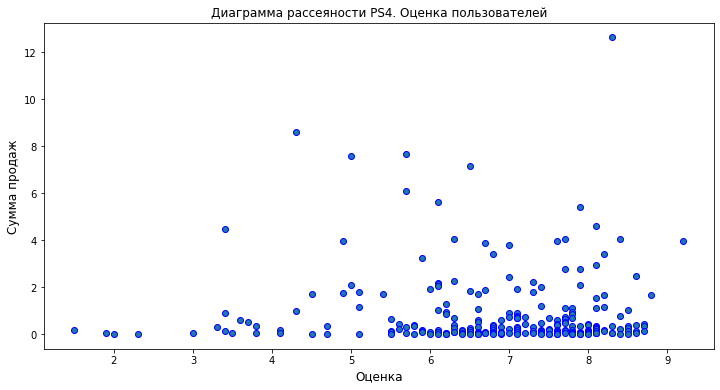

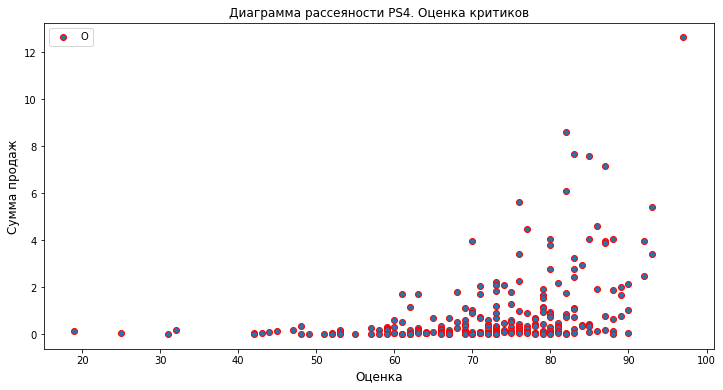

In [18]:
#Посмотрим данные показтели и для других платформ
data_new_ps4 = data_new[data_new['platform']=='PS4']
print("Корреляция между отзывами и продажами:",data_new_ps4['user_score'].corr(data_new_ps4['total_sales']))
print("Корреляция между оценкой критиков и продажами:",data_new_ps4['critic_score'].corr(data_new_ps4['total_sales']))

#построим диаграмму рассеяности 
plt.figure(figsize=(12,6))
plt.scatter(x='user_score', y='total_sales', data=data_new_ps4 , edgecolors = 'blue')
plt.title('Диаграмма рассеяности PS4. Оценка пользователей')
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)


plt.figure(figsize=(12,6))
plt.scatter(x='critic_score', y='total_sales', data=data_new_ps4 , edgecolors = 'red')
plt.title('Диаграмма рассеяности PS4. Оценка критиков')
plt.legend('Оценка критиков')
plt.xlabel('Оценка', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)


Корреляция между отзывами и продажами является слабоотрицательной, поэтому можно сделать вывод, что оценка пользователей не влияет на продажи. А корреляция между оценкой критиков и продажам положительно отрицательная, но также слаба, следовательо и оценка критиков не влияет на продажи. Я думаю, что популярность отдельных игр могла быть связана с рекламными компаниями платформы. 

На всех платформа замечается низкая корреляция, можно сделать вывод, что продажи не зависят от отзывов. 

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64


Text(0, 0.5, 'Сумма продаж')

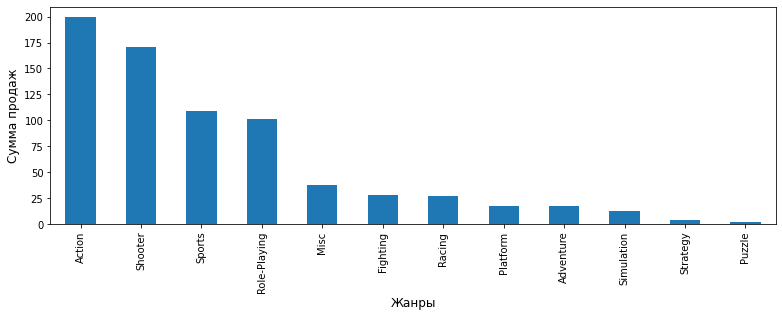

In [19]:
data_genre = data_new.groupby(by='genre')['total_sales'].sum().sort_values(ascending=False)
print(data_genre)
data_genre.plot(kind='bar', figsize=(13,4))
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)

Можно выделить самые распространные жанры по продажам: Action, Shooter. Реже всего покупают: Puzzle,Strategy. Это можно объяснить тем, что в данный период жанры экшен и шутер только набирали свою популярность. Пользователей больше привликали игры с хорошей графикой и интерсейсом, которые приближены к реальной жизни, нежели устаревшие жанры пазлов и стратегии. С улучшением возможностей ПК возрос спрос на новые жанры. 

Сравним медианны продаж для разных жанров. 

Text(0, 0.5, 'Сумма продаж')

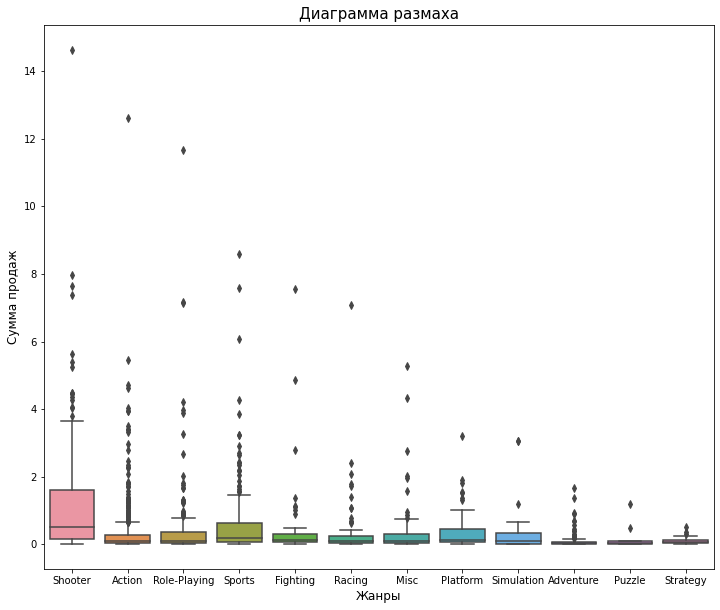

In [20]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.boxplot(data=data_new, x='genre', y='total_sales')
plt.title('Диаграмма размаха', fontsize=15)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)

По диаграмме размаха видно, что больше всего продаются жанры schooter, sports, platform. 
Такое отличие связано с тем, что у различных жанров есть отдельные продажы по играм, которыестали очень популярными. 

## Составление портрета пользователя каждого региона

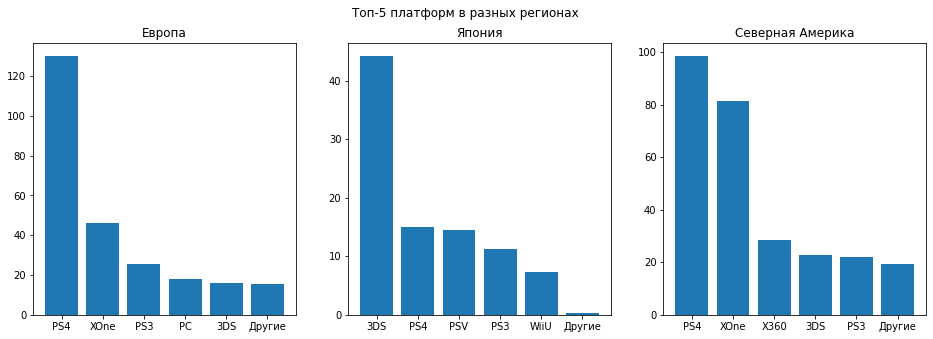

In [21]:
#топ-5 платформ для Европы
data_platform_eu = pd.pivot_table(data_new, index='platform', values='eu_sales', aggfunc='sum')\
              .sort_values('eu_sales',ascending=False).reset_index()
top_eu = data_platform_eu.head(5)
data_platform_eu['platform']=data_platform_eu['platform'].where(data_platform_eu['platform']\
                                                           .isin(top_eu['platform']),'Другие')

#топ-5 платформ для Японии
data_platform_jp = pd.pivot_table(data_new, index='platform', values='jp_sales', aggfunc='sum')\
              .sort_values('jp_sales',ascending=False).reset_index()
top_jp = data_platform_jp.head(5)
data_platform_jp['platform']=data_platform_jp['platform'].where(data_platform_jp['platform']\
                                                           .isin(top_jp['platform']),'Другие')
#топ-5 платформ для Северной Америки
data_platform_na = pd.pivot_table(data_new, index='platform', values='na_sales', aggfunc='sum')\
              .sort_values('na_sales',ascending=False).reset_index()
top_na = data_platform_na.head(5)
data_platform_na['platform']=data_platform_na['platform'].where(data_platform_na ['platform']\
                                                           .isin(top_na['platform']),'Другие')


fig, (ax,ax1,ax2) = plt.subplots(1,3, figsize=(16,5))
fig.suptitle('Топ-5 платформ в разных регионах')

ax.bar(data_platform_eu['platform'],data_platform_eu['eu_sales'])
ax.set_title('Европа')
ax1.bar(data_platform_jp['platform'],data_platform_jp['jp_sales'])
ax1.set_title('Япония')
ax2.bar(data_platform_na['platform'],data_platform_na['na_sales'])
ax2.set_title('Северная Америка')
plt.show()

- В Европе самым популярной платформой является PS4, которая сильно отличается от показателей остальных платформ 
- В Японии попурной платформой является 3DS
- в Северной Америки есть 2 популярные платформы PS4 и XOne

/tmp/ipykernel_813/3288621585.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_genre_eu.colums=['eu_sales']
/tmp/ipykernel_813/3288621585.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_genre_jp.colums=['jp_sales']
/tmp/ipykernel_813/3288621585.py:36: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_genre_na.colums=['na_sales']


Text(0.5, 1.0, 'Северная Америка')

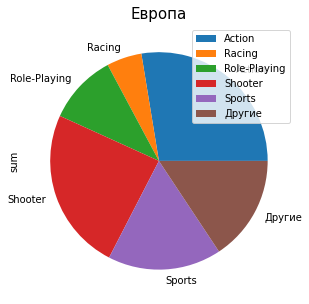

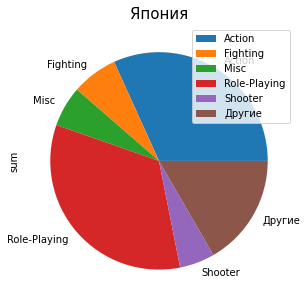

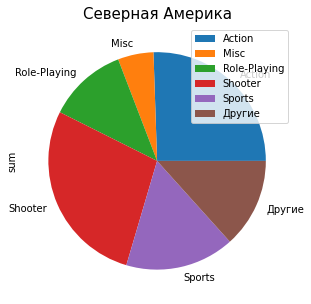

In [22]:
#топ-5 жанров для Европы
data_genre_eu = pd.pivot_table(data_new, index='genre', values='eu_sales', aggfunc='sum')\
              .sort_values('eu_sales',ascending=False).reset_index()
top_eu_genre = data_genre_eu.head(5)
data_genre_eu['genre']=data_genre_eu['genre'].where(data_genre_eu['genre']\
                                                           .isin(top_eu_genre['genre']),'Другие')

data_genre_eu=data_genre_eu.groupby(by='genre').agg(["sum"])
data_genre_eu.colums=['eu_sales']


data_genre_eu['eu_sales'].plot(kind='pie', figsize=(5,5), subplots=True)
plt.title('Европа', fontsize=15)

#топ-5 жанров для Японии
data_genre_jp = pd.pivot_table(data_new, index='genre', values='jp_sales', aggfunc='sum')\
              .sort_values('jp_sales',ascending=False).reset_index()
top_jp_genre = data_genre_jp.head(5)
data_genre_jp['genre']= data_genre_jp['genre'].where(data_genre_jp['genre']\
                                                           .isin(top_jp_genre['genre']),'Другие')

data_genre_jp=data_genre_jp.groupby(by='genre').agg(["sum"])
data_genre_jp.colums=['jp_sales']

data_genre_jp['jp_sales'].plot(kind='pie', figsize=(5,5), subplots=True)
plt.title('Япония', fontsize=15)

#топ-5 жанров для Северной Америки
data_genre_na = pd.pivot_table(data_new, index='genre', values='na_sales', aggfunc='sum')\
              .sort_values('na_sales',ascending=False).reset_index()
top_na_genre = data_genre_na.head(5)
data_genre_na['genre']= data_genre_na['genre'].where(data_genre_na ['genre']\
                                        .isin(top_na_genre['genre']),'Другие')

data_genre_na = data_genre_na.groupby(by='genre').agg(["sum"])
data_genre_na.colums=['na_sales']


data_genre_na['na_sales'].plot(kind='pie', figsize=(5,5), subplots=True)
plt.title('Северная Америка', fontsize=15)




Самые популярные жанры во всех регионах Action, Schooter и Role-Playing

/tmp/ipykernel_813/1748283296.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_rating_eu.colums=['eu_sales']
/tmp/ipykernel_813/1748283296.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_rating_jp.colums=['jp_sales']
/tmp/ipykernel_813/1748283296.py:36: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data_rating_na.colums=['na_sales']


Text(0.5, 1.0, 'Северная Америка')

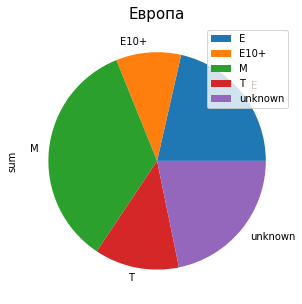

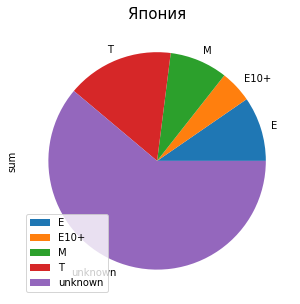

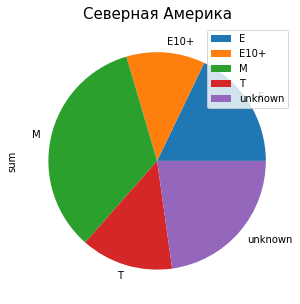

In [23]:
#влияние рейтинга ERSB для Европы
data_rating_eu = pd.pivot_table(data_new, index='rating', values='eu_sales', aggfunc='sum')\
              .sort_values('eu_sales',ascending=False).reset_index()
top_eu_rating = data_rating_eu.head(5)
data_rating_eu['rating']=data_rating_eu['rating'].where(data_rating_eu['rating']\
                                                           .isin(top_eu_rating['rating']),'Другие')

data_rating_eu=data_rating_eu.groupby(by='rating').agg(["sum"])
data_rating_eu.colums=['eu_sales']


data_rating_eu['eu_sales'].plot(kind='pie', figsize=(5,5), subplots=True)
plt.title('Европа', fontsize=15)

#влияние рейтинга ERSB для Японии
data_rating_jp = pd.pivot_table(data_new, index='rating', values='jp_sales', aggfunc='sum')\
              .sort_values('jp_sales',ascending=False).reset_index()
top_jp_rating = data_rating_jp.head(5)
data_rating_jp['rating']= data_rating_jp['rating'].where(data_rating_jp['rating']\
                                                           .isin(top_jp_rating['rating']),'Другие')

data_rating_jp=data_rating_jp.groupby(by='rating').agg(["sum"])
data_rating_jp.colums=['jp_sales']

data_rating_jp['jp_sales'].plot(kind='pie', figsize=(5,5), subplots=True)
plt.title('Япония', fontsize=15)

#влияние рейтинга ERSB для Северной Америки
data_rating_na = pd.pivot_table(data_new, index='rating', values='na_sales', aggfunc='sum')\
              .sort_values('na_sales',ascending=False).reset_index()
top_na_rating = data_rating_na.head(5)
data_rating_na['rating']= data_rating_na['rating'].where(data_rating_na ['rating']\
                                        .isin(top_na_rating['rating']),'Другие')

data_rating_na = data_rating_na.groupby(by='rating').agg(["sum"])
data_rating_na.colums=['na_sales']


data_rating_na['na_sales'].plot(kind='pie', figsize=(5,5), subplots=True)
plt.title('Северная Америка', fontsize=15)

- В Северной Америке самым популярным жанром является Schooter и Action, а самой популярной плаформой PS4. Большее количество продаж приходится на игры с рейтингом 'M'
- В Европе самым популярным жанром является Action, а самой популярной платоформой PS4. Чаще всего в этом регионе выбирают игры с рейтингом "М", вторыми по продажами являются игры без оценки. Из этого можно сделать вывод, что оценка не влиет на продажи. 
- В Японии самым полярным жанром является Role-Playing, а самой популярной платформой 3DS. В это регионе чаще всего выбирают игры без рейтинга, поэтому совершенно точно можно сказать, что оценка никак не влияет на продажи.  
- В других странах приобладает жанр Action, а платформа PS4. Для остальных регионов рейтинг также влияет, такак как в основом пользователи выбирают игры с оценкой "М", а второе место занимают игры без оценки, следовательно оценка также не влиет на продажи. 

Для большенства регионов беспорным лидером среди жанров является Action, с которым конкурирует Shooter,  исключением Японии. Также можно сказать и о платформах. Во всех регионах, кроме Северной Америки лидирует PS3, а второе место занимает X360. За исключениме Японии, где беспорным лидером является 3DS. Очень часто пользователи выбирают игры без рейтинга, поэтому можно сказать, что он не влияет на продажи. 


In [24]:
# Комментарий ревьюера
temp = data_new.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

## Проверка гипотез
### Выдвинем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые 
**Альтернативная гипотеза: Средне пользовательский рейтинг платформ Xbox One и PC разный***

In [25]:
xone = data_new[(data_new['platform'] == 'XOne') & (data_new['user_score'] > 0)]['user_score']
pc = data_new[(data_new['platform'] == 'PC') & (data_new['user_score'] > 0)]['user_score']

print(xone.count())
print(xone.count())

165
165


Так как отобранные нами срез имеет достаточно малый объем, то можем взять значение alpha = 0.05. И провести t-распределения Стьюдетна, так как выборки независят друг от друга.

In [26]:
from scipy import stats as st

xone = data_new[(data_new['platform'] == 'XOne') & (data_new['user_score'] > 0)]['user_score']
pc = data_new[(data_new['platform'] == 'PC') & (data_new['user_score'] > 0)]['user_score']
results = st.ttest_ind(xone, pc, equal_var=False)

alpha = 0.05

print(results.pvalue)
 
if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



0.11601398086668832
Не получилось отвергнуть нулевую гипотезу




На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу о равенстве средних значений **cредне пользовательский рейтинг платформ Xbox One и PC**.

### Выдвинем нулевую гипотезу: Средне пользовательская оценка жанров Action и Sport одинаковые.
**Альтернативная гипотеза: Средне пользовательская оценка жарнов Action и Sport разная.** 

In [27]:
action = data_new[(data_new['genre'] == 'Action') & (data_new['user_score'] > 0)]['user_score']
sports = data_new[(data_new['genre'] == 'Sports') & (data_new['user_score'] > 0)]['user_score']

print(action.count())
print(sports.count())

297
127


Аналогчно с предыдущей проверкой гипотезы проведем t-тест. 

In [28]:
action = data_new[(data_new['genre'] == 'Action') & (data_new['user_score'] > 0)]['user_score']
sports = data_new[(data_new['genre'] == 'Sports') & (data_new['user_score'] > 0)]['user_score']
results = st.ttest_ind(action, sports, equal_var=False)


alpha = 0.05

print(results.pvalue)

if (results.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


1.1825550382644557e-14
Отвергаем нулевую гипотезу


На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) **жанров Action и Sports в пользу альтернативной гипотезы**.

Для проведение анализа мы использовали критерий P-value. Благодаря этому показателю мы получаем вероятность получить значение стистики критерия равное наблюдаемому.  
И мы сравниваем его с уровенем значимости (𝛼) равное 0,05. Это означает, что при исследовании мы отвергним нулевую гипотезу в 5% случаев, даже при условии ее правдивости. 
При сравнии этих друг показателей мы можем определить правильность выдвинутой гипотезы. 



## Общий вывод

В процессе анализа мы сделали: 
- Проанализировали полученный набор данных. 
- Заменили пропущенные значения, дубликаты и исключили данные, которые не носили в себе цельной информации для анализа. Для столбца 'user_score' мы проверили подробный анализ с уточнениями аббревиатуры "tbd", в ходе которого выявили, что оно обозначает "не определено". Для столбца даты мы также провели исследование и узнали, что часть названий содержит в себе год создания и использовали этот показатель для столбца "year_of_release".  
- Провели анализ данных после обработки для понимания результатов для разных платформ в разрезах всего промежутка их существования. 
- Выделили акуальные на данный момент набор данных для дальнейшего анализа. 
- Составили портрет по регионам. 
- Проверили гипотезы, которые были выдвинуты. 

В ходе исследования нам получилось выяснить, что самым популярным жанром с 2014 по 2016 год является Action и Schooter. Для каждого региона за исключением Японии. 
 
Исследуя различные платформы нам удалось выяснить, что средний срок "жизни" платформы 8-10 лет. Чаще всего они продают самое большое количество игр спустя 4-5 лет после основания, за исключением отдельных платформ. 
Мы выснили, что игровая индустрия начала свое развитие с 1980 года и развивалась с каждым годом, до мирового кризиса в 2009 году, который снизил появляение новых игр. 

В следующем году я бы акцентировала внимание на такие жанры игр как Schooter и Role-Playing. Так как в Северной Америке жанр Schooter занимает первое место в рейтинге, а Европе и других регионах, которые мы не рассматривали более детально они занимаю второе место. Следовательно, при большей рекламной компании в данном регионе игры этого жанра могли занять первую позицию. Также стоит обратить внимание на жанр Role-Playing, так как он уже приобрел популярность в Японии и есть вероятность, что полюбится пользователям и из других регионах. И конечно можно выделить небольшую часть на развитие жанра Sport, так как почти во всех регионах он занимает 3 место.

Самым популярной платформой является PS4, одна при сравнении продаж с прошлым годом ее популярность снизилась и может набирать такие же обороты, возможно стоит вкладывать в рекламы даной платформы. То же самое можно сказать и про XOne - относительно новая платформа, но занимает 2 место и имеет тенденцию снижения продаж, в сравнении 2015 и 2016 года. Также есть смысл вкладываться в платформу 3DS, так как она существует с 2010 годаи и еще будет актуальна от 2 до 3 лет, одна имеет тенденцию спада продаж. Останые платформы нет смысла развивать, так как они имеют достаточно большой срок "жизни" и скорее всего потеряют свою актуальность окончательно с 2017 году. 

Я счиатаю, что обращаться внимание на отзывы, так как чаще всего люди не производят данную оценку или же она вообще не влиет на продажи. 